In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [2]:
buffer_country = 2 * 0.009
buffer_harbor = 50 * 0.009

In [61]:
# Get the data and dissolve it
harbors = gpd.read_file("global_harbors.json")
countries = gpd.read_file("Countries/ne_50m_admin_0_countries.shp")
countries_dissolved = gpd.GeoDataFrame(countries.dissolve()["geometry"])
harbors_dissolved = gpd.GeoDataFrame(harbors.dissolve()["geometry"])
# Create the buffers
buffered_harbors = gpd.GeoDataFrame(harbors_dissolved.buffer(buffer_harbor))
buffered_harbors.columns=["geometry"]
buffered_countries = gpd.GeoDataFrame(countries_dissolved.buffer(buffer_country))
buffered_countries.columns=["geometry"]


/tmp/ipykernel_61611/1660792885.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_harbors = gpd.GeoDataFrame(harbors_dissolved.buffer(buffer_harbor))
/tmp/ipykernel_61611/1660792885.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_countries = gpd.GeoDataFrame(countries_dissolved.buffer(buffer_country))


In [62]:
# Combine the two bufferes
buffer_both = buffered_countries.union(buffered_harbors)
buffer_both

0    MULTIPOLYGON (((-16.98817 14.39150, -17.05082 ...
dtype: geometry

In [54]:
buffered_countries

,geometry
0,"MULTIPOLYGON (((-16.65809 14.01844, -16.66317 ..."


In [63]:
buffer_diff = gpd.GeoDataFrame(buffer_both.difference(countries_dissolved))
buffer_diff.columns = ["geometry"]
buffer_diff = buffer_diff.dissolve()

In [65]:
buffer_diff.to_file("harbor_cost_buffer.geojson", driver='GeoJSON')

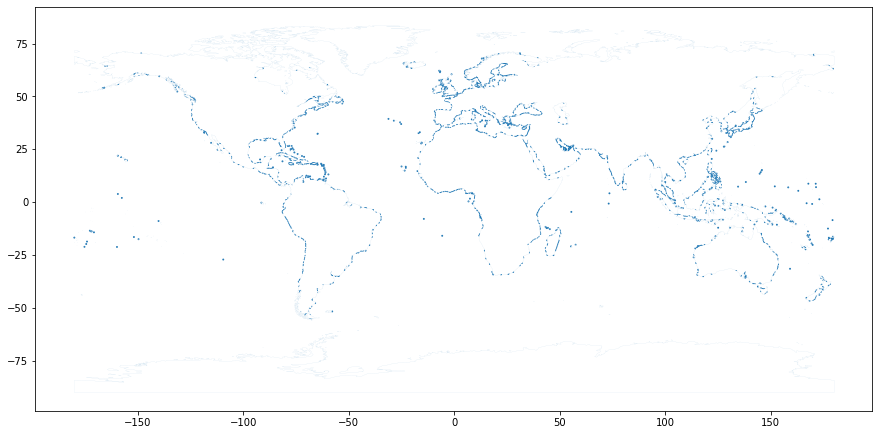

In [64]:
buffer_diff.plot(figsize=(15,15))
plt.savefig("test.png",dpi=300)